# Anaysis of Follower-force Buckling Dynamics Data

In [231]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

In [262]:
# Load the file and extract data
# root_folder = '/Volumes/DEEPAK-1TB/ActiveFilaments_Simulations_Backup_1/FollowerForce_BucklingDynamics_Simulations/activity_time_1000'
# root_folder = '/Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/activity_timescale_1000'
root_folder = '/Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000'
# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_4_k_15_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'


In [263]:
# List all files in the folder
folders = next(os.walk(root_folder))[1]

for ii, folder in enumerate(folders):
    print(ii, folder)


0 SimResults_Np_32_Shape_line_kappa_hat_9_k_35_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
1 SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
2 SimResults_Np_32_Shape_line_kappa_hat_20_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
3 SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
4 SimResults_Np_32_Shape_line_kappa_hat_8_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
5 SimResults_Np_32_Shape_line_kappa_hat_25_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
6 SimResults_Np_32_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
7 SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
8 SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
9 SimResults_Np_32_Shape_line_kappa_hat_12_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
10 SimResul

## Run analysis on each filament condition

SimResults_Np_32_Shape_line_kappa_hat_9_k_35_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 35
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_9_k_35_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_9_k_35_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity pro

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_9_k_35_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_48.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_9_k_35_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_29.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_9_k_35_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_38.hdf5
[1.24957601e-05 3.20695572e-02 6.41266059e-02 9.61836417e-02
 1.28240665e-01 1.60297675e-01 1.92354673e-01 2.24411658e-01
 2.56468630e-01 2.88525590e-01 3.20582538e-01 3.52639474e-01
 3.84696397e-01 4.16753309e-01 4.48810209e-01 4.80867097e-01
 5.12923974e-01 5.44980840e-01 5.77037695e-01 6.09094539e-01
 6.41151372e-01 6.73208195e-01 7.05265008e-01 7.37321812e-01
 7.69378606e-01 8.01435390e-01 8.33492166e-01 8.65548933e-01
 8.97605692e-01 9.29662443e-01 9.61719186e-01 9.93775922e-01
 1.02583265e+00 1.05788937e+00 1.08994609e+00 1.12200280e+00
 1.15405950e+00 1.18611620e+00 1.21817290e+00 1.2502295

<IPython.core.display.Javascript object>


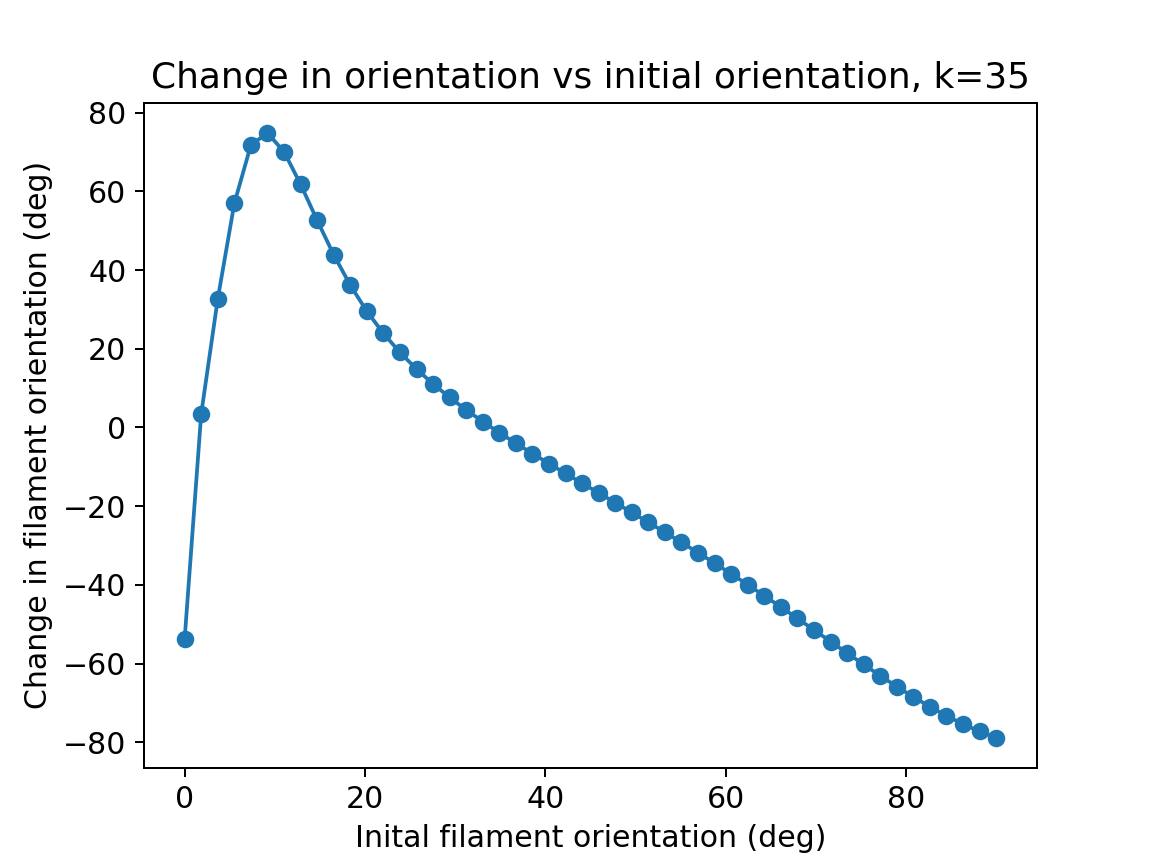

SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 75
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_09.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_48.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_34.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_14.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

<IPython.core.display.Javascript object>


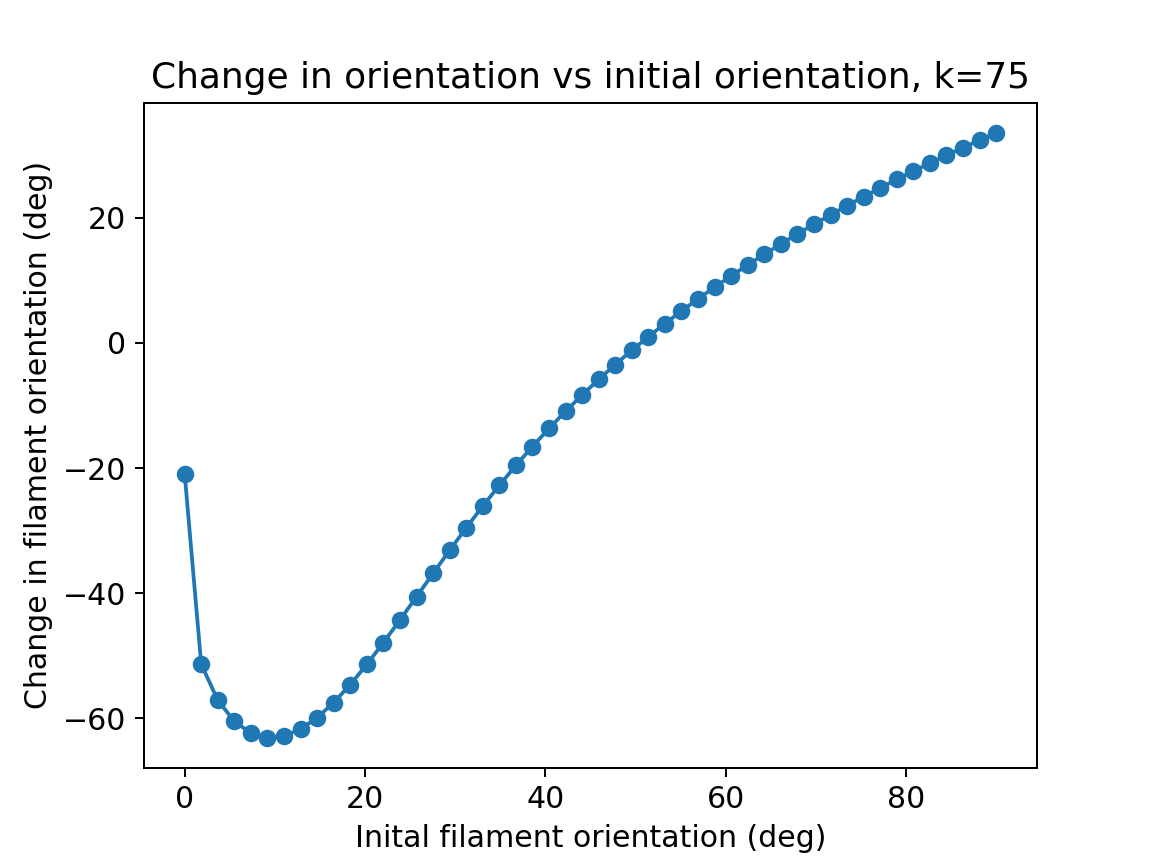

SimResults_Np_32_Shape_line_kappa_hat_20_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 80
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_20_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_20_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_20_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_48.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_20_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_29.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_20_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_22.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_20_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_34.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

<IPython.core.display.Javascript object>


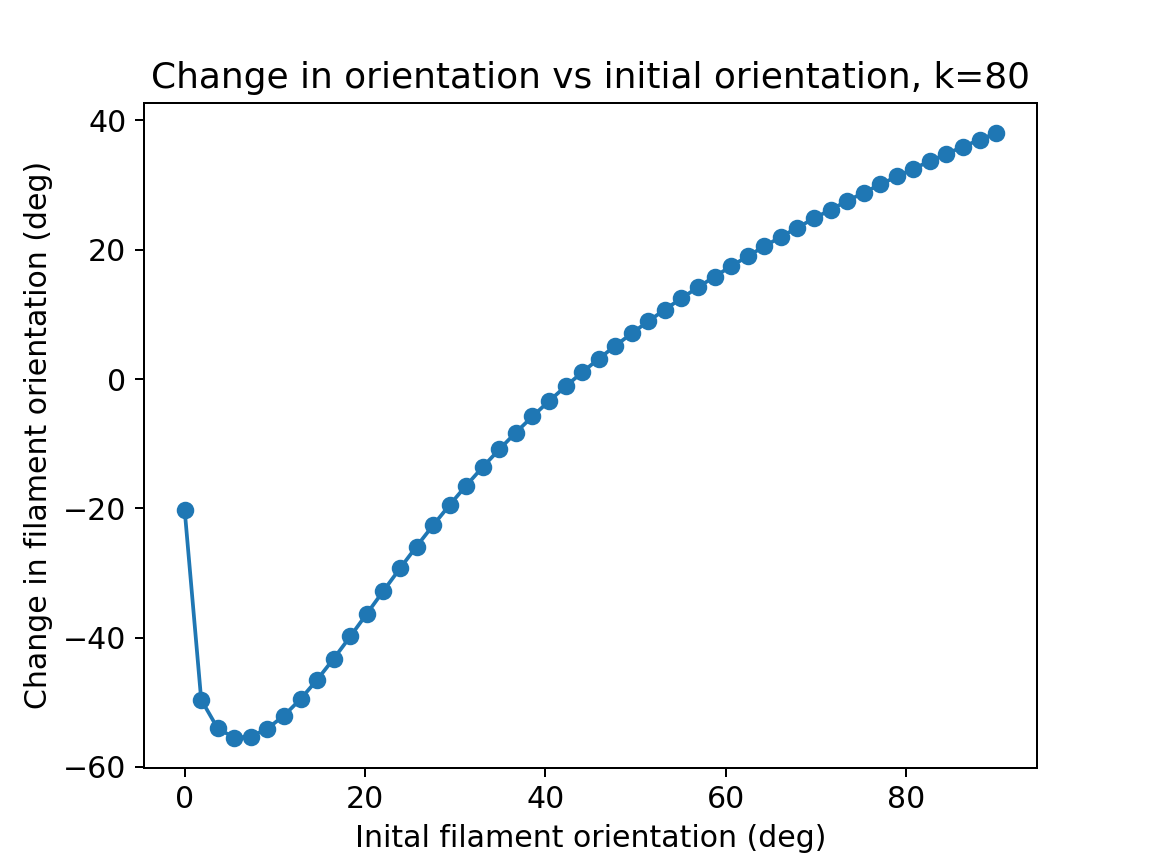

SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 90
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_27.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_31.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_33.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_25.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_24.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_32.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_34.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_22_k_90_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_63.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

<IPython.core.display.Javascript object>


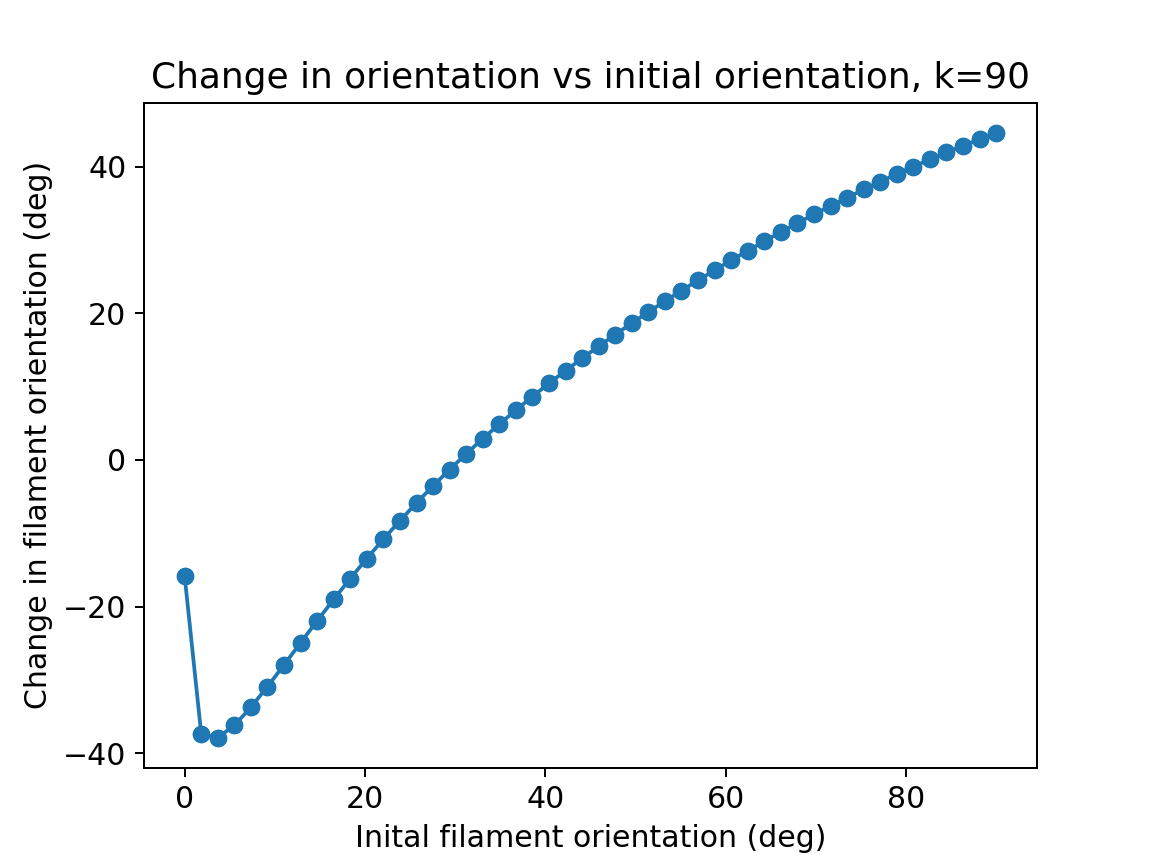

SimResults_Np_32_Shape_line_kappa_hat_8_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 30
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_8_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_8_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity pro

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_8_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_25.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_8_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_09.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_8_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_19.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_8_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_18.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000

<IPython.core.display.Javascript object>


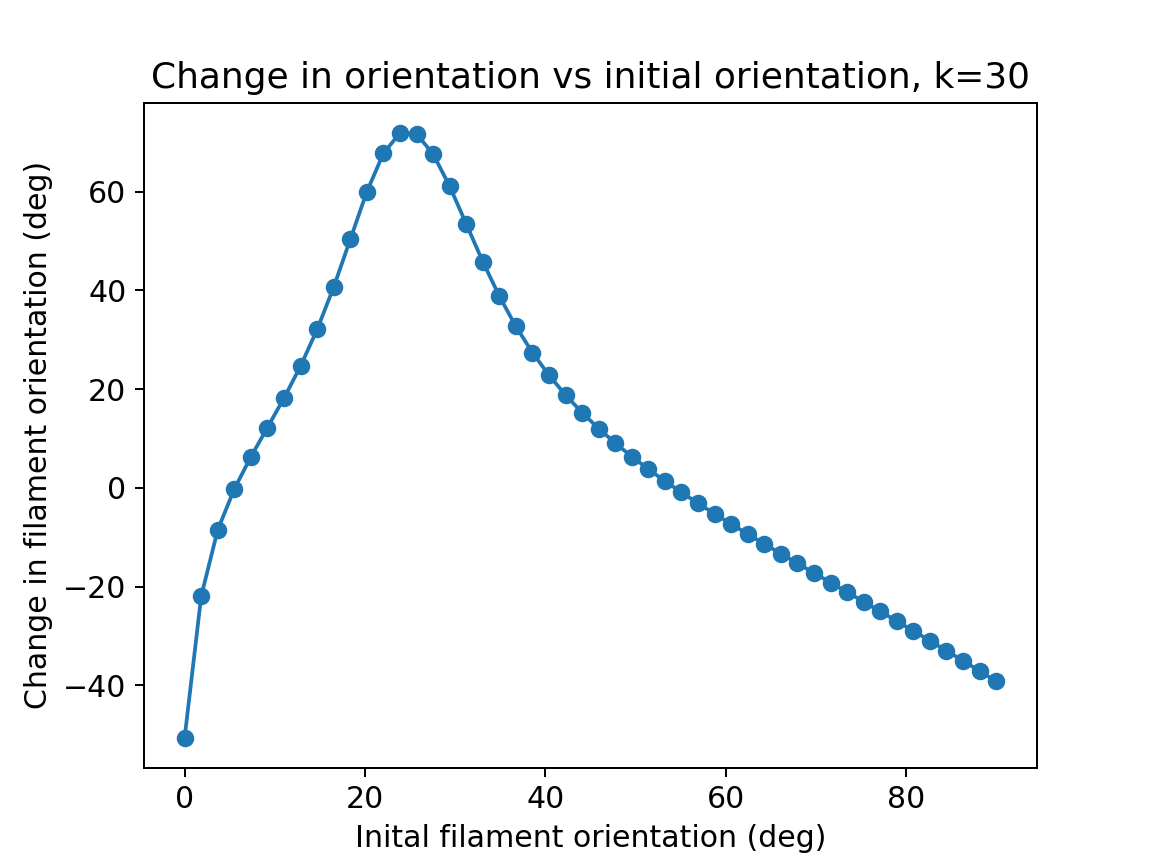

SimResults_Np_32_Shape_line_kappa_hat_25_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 100
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_25_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_25_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activ

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_25_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_13.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_25_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_12.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/Lacr

Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_25_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_02.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_25_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_38.hdf5
[1.24957601e-05 3.20695572e-02 6.41266059e-02 9.61836417e-02
 1.28240665e-01 1.60297675e-01 1.92354673e-01 2.24411658e-01
 2.56468630e-01 2.88525590e-01 3.20582538e-01 3.52639474e-01
 3.84696397e-01 4.16753309e-01 4.48810209e-01 4.80867097e-01
 5.12923974e-01 5.44980840e-01 5.77037695e-01 6.09094539e-01
 6.41151372e-01 6.73208195e-01 7.05265008e-01 7.37321812e-01
 7.6

<IPython.core.display.Javascript object>


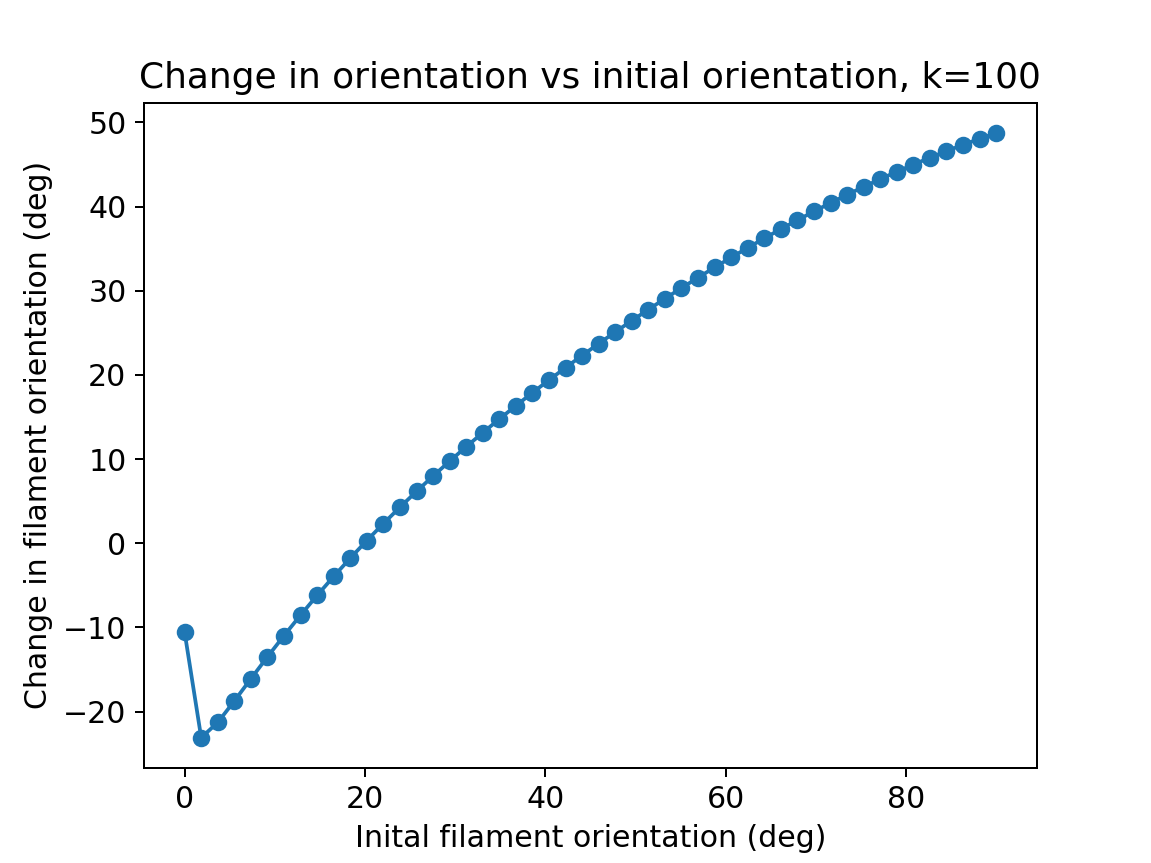

SimResults_Np_32_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 70
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

Data file SimResults_48.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_29.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_05.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path: 

Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_34.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_14.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_18_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data

<IPython.core.display.Javascript object>


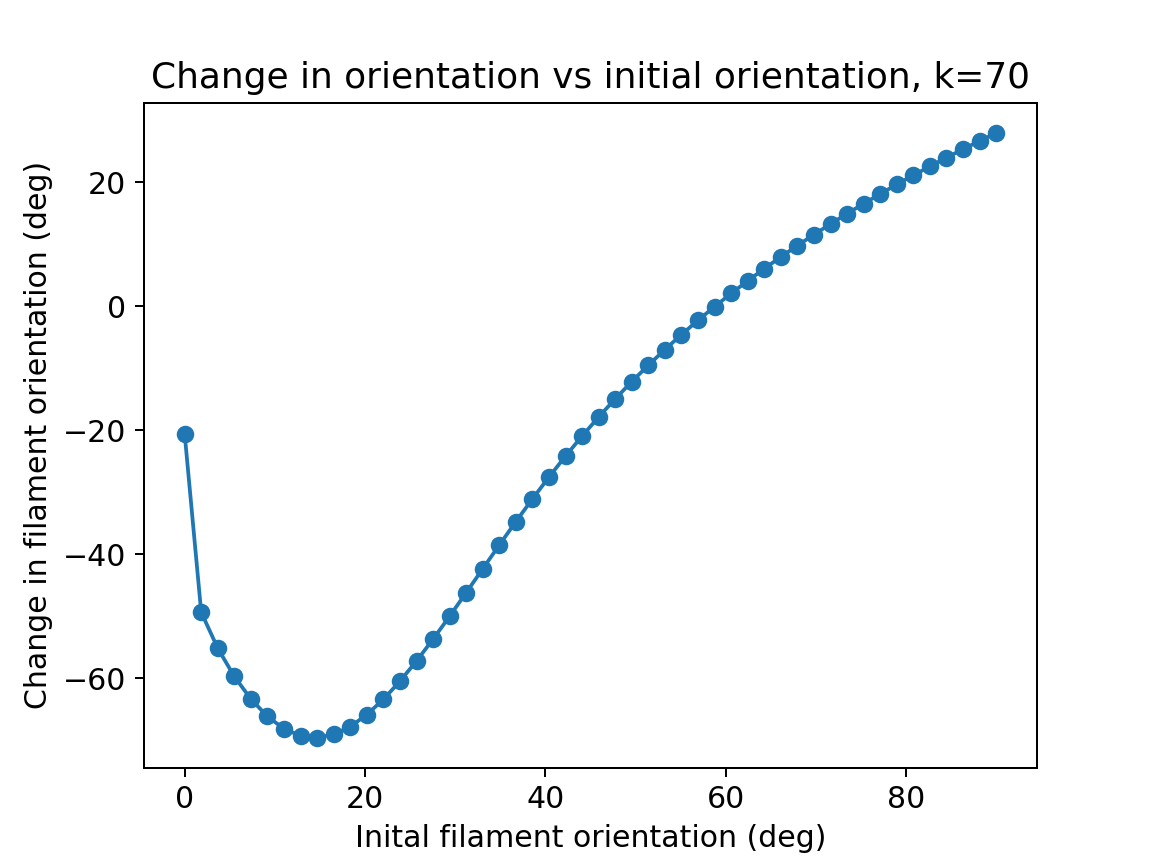

SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 85
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_25.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_09.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_14.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_21_k_85_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_43.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

<IPython.core.display.Javascript object>


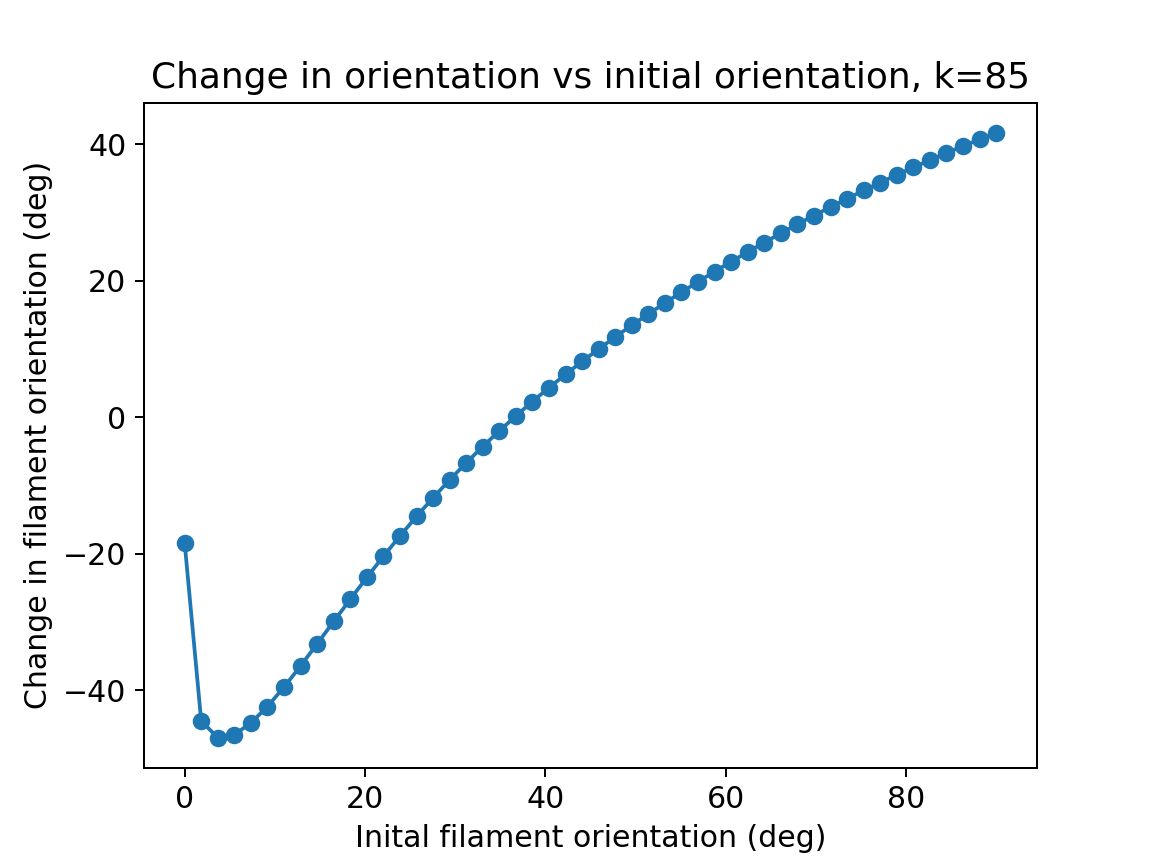

SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 55
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_25.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_09.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_19.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_14_k_55_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_18.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

<IPython.core.display.Javascript object>


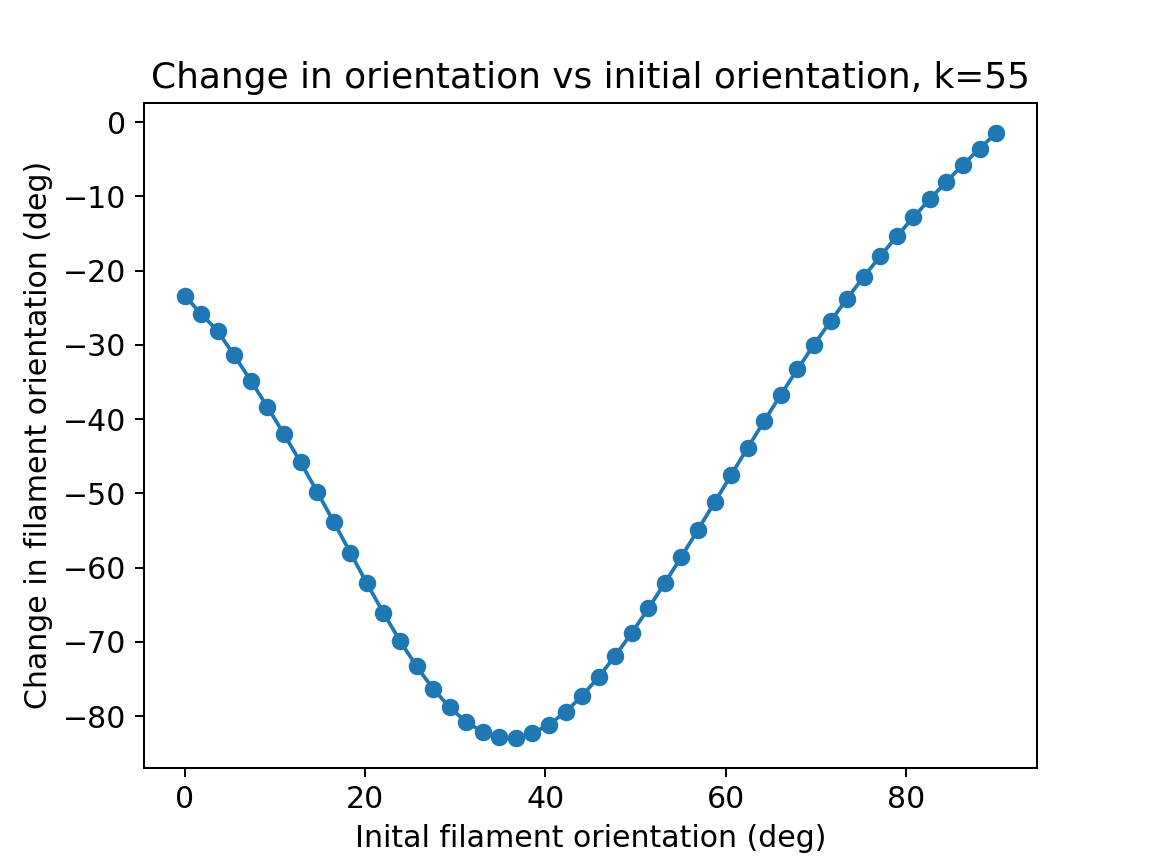

SimResults_Np_32_Shape_line_kappa_hat_12_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 50
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_12_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_12_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_12_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_09.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_12_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_48.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_12_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_43.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_12_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_02.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

<IPython.core.display.Javascript object>


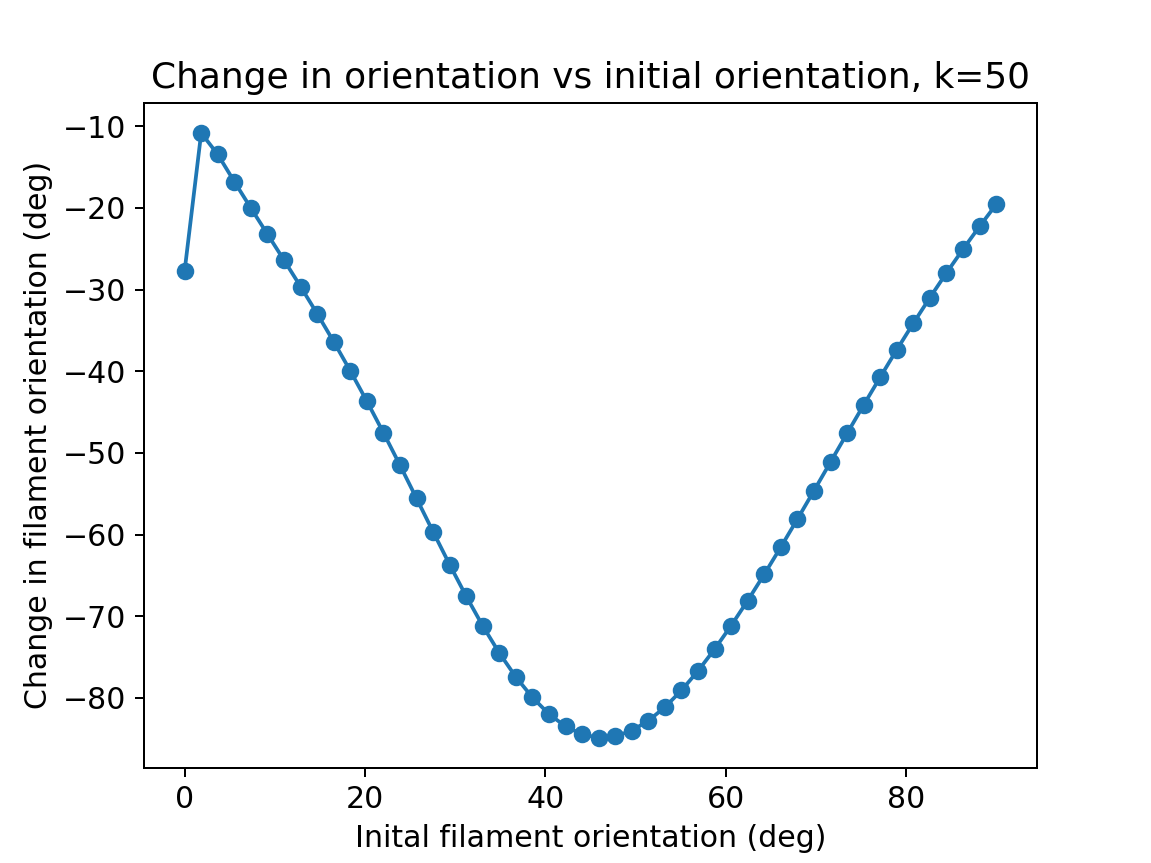

SimResults_Np_32_Shape_line_kappa_hat_10_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 40
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_10_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_10_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_10_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_48.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_10_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_29.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_10_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_14.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_10_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_43.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

<IPython.core.display.Javascript object>


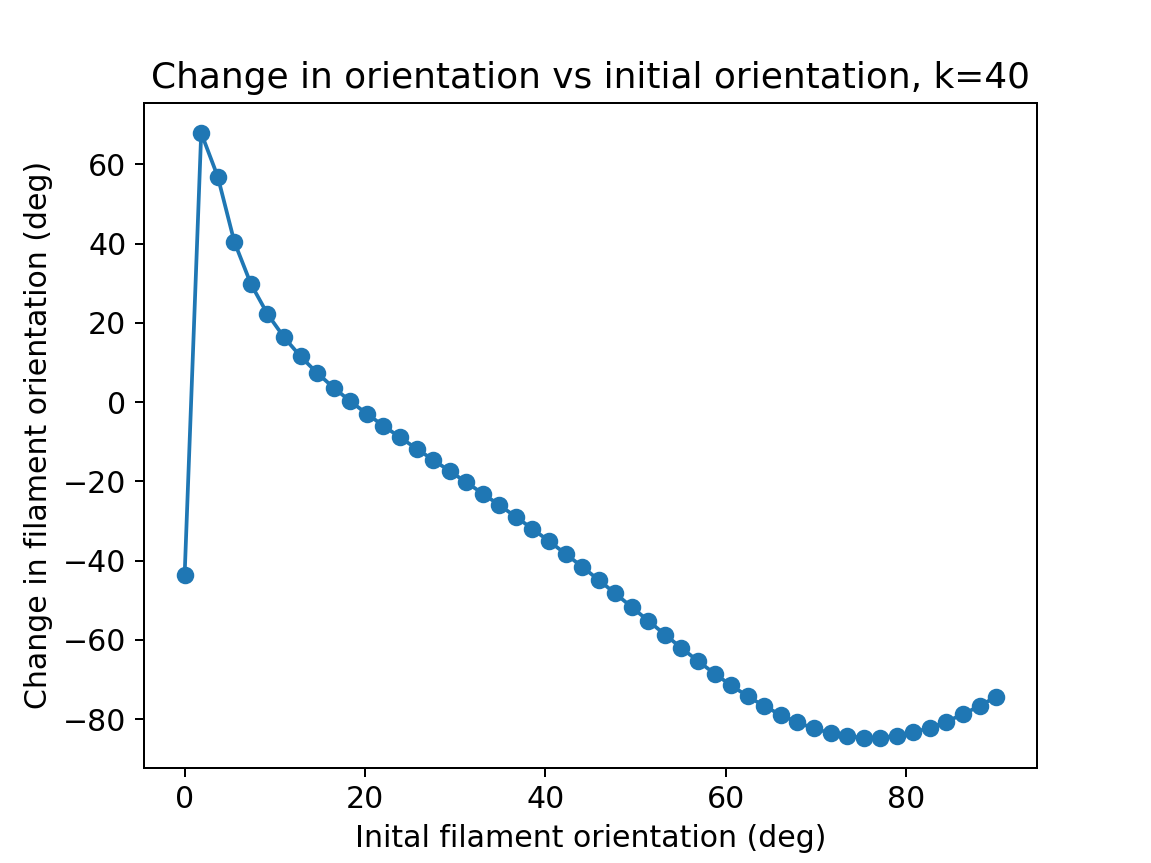

SimResults_Np_32_Shape_line_kappa_hat_15_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 60
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_15_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_15_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_15_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_09.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_15_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_48.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_15_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_22.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_15_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_34.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

<IPython.core.display.Javascript object>


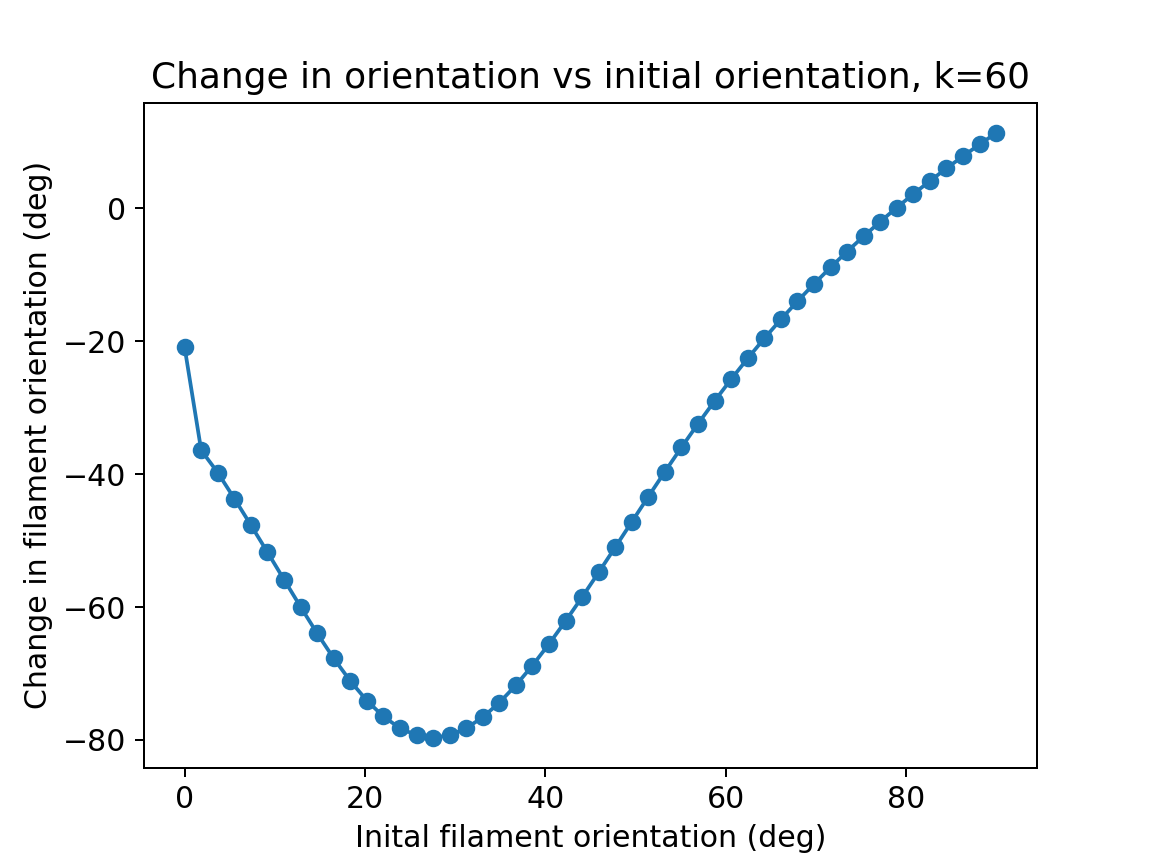

SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 45
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_25.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_09.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_19.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_11_k_45_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_18.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

<IPython.core.display.Javascript object>


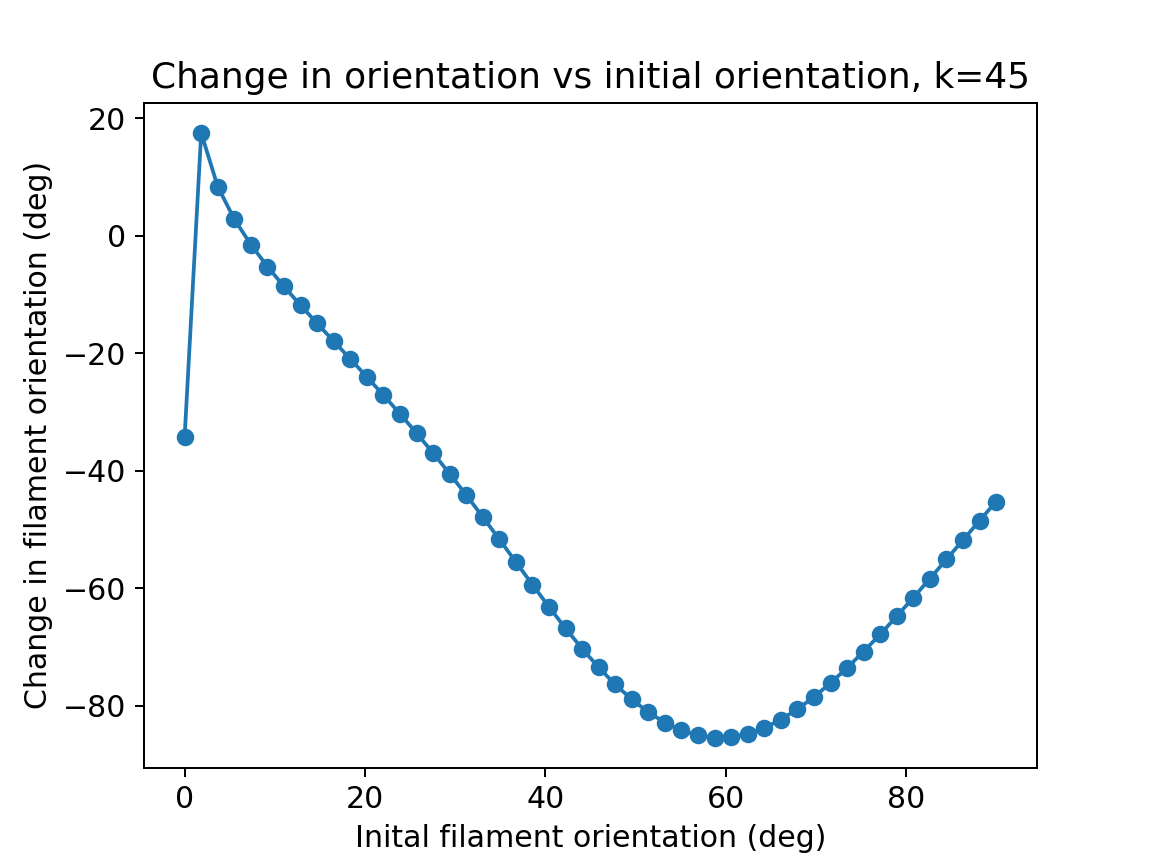

SimResults_Np_32_Shape_line_kappa_hat_24_k_95_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 95
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_24_k_95_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_24_k_95_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_24_k_95_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_07.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_24_k_95_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_06.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_li

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_24_k_95_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_45.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_24_k_95_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_53.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_24_k_95_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_18.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_24_k_95_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_59.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_20

<IPython.core.display.Javascript object>


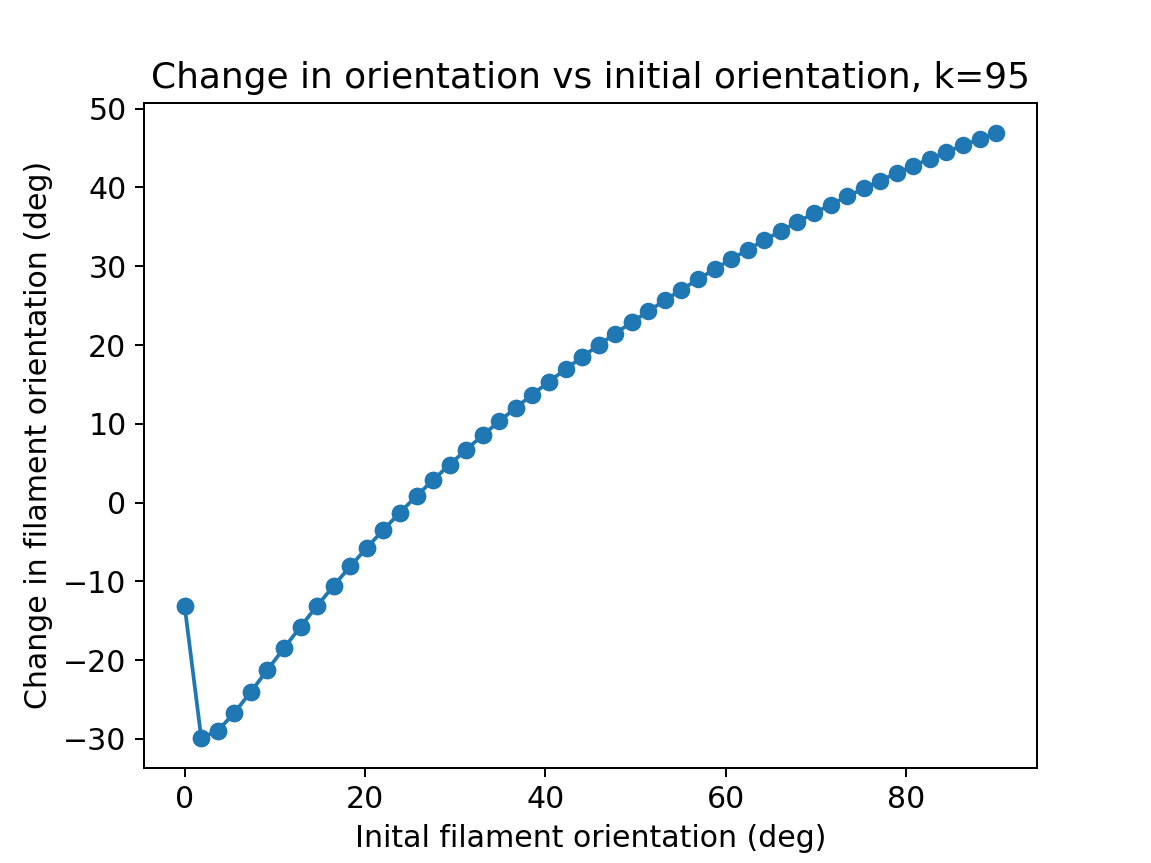

SimResults_Np_32_Shape_line_kappa_hat_16_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 65
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_16_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_16_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity 

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_16_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_48.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_16_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_29.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryM

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_16_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_02.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_16_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_38.hdf5
[1.24957601e-05 3.20695572e-02 6.41266059e-02 9.61836417e-02
 1.28240665e-01 1.60297675e-01 1.92354673e-01 2.24411658e-01
 2.56468630e-01 2.88525590e-01 3.20582538e-01 3.52639474e-01
 3.84696397e-01 4.16753309e-01 4.48810209e-01 4.80867097e-01
 5.12923974e-01 5.449808

<IPython.core.display.Javascript object>


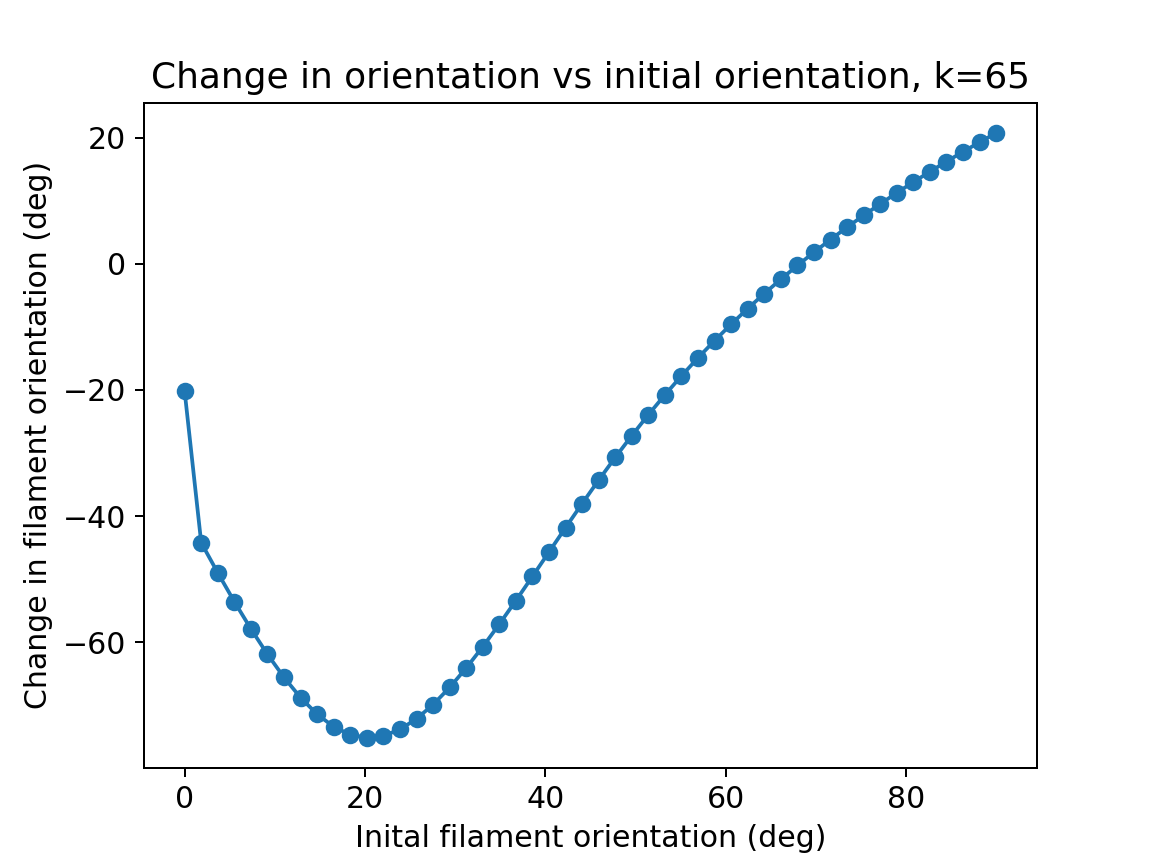

SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Activity time 2000
Spring constant 25
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_17.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_40.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity pro

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_25.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_09.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000

Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_34.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_14.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile not found!
Time step: 0.9995002498750625
No:of particles : 32
No:of time points : 2001
Root path:  /Users/deepak/Dropbox/LacryModeling/ModellingResults/2021-04-15/b0_4_activity_timescale_2000

<IPython.core.display.Javascript object>


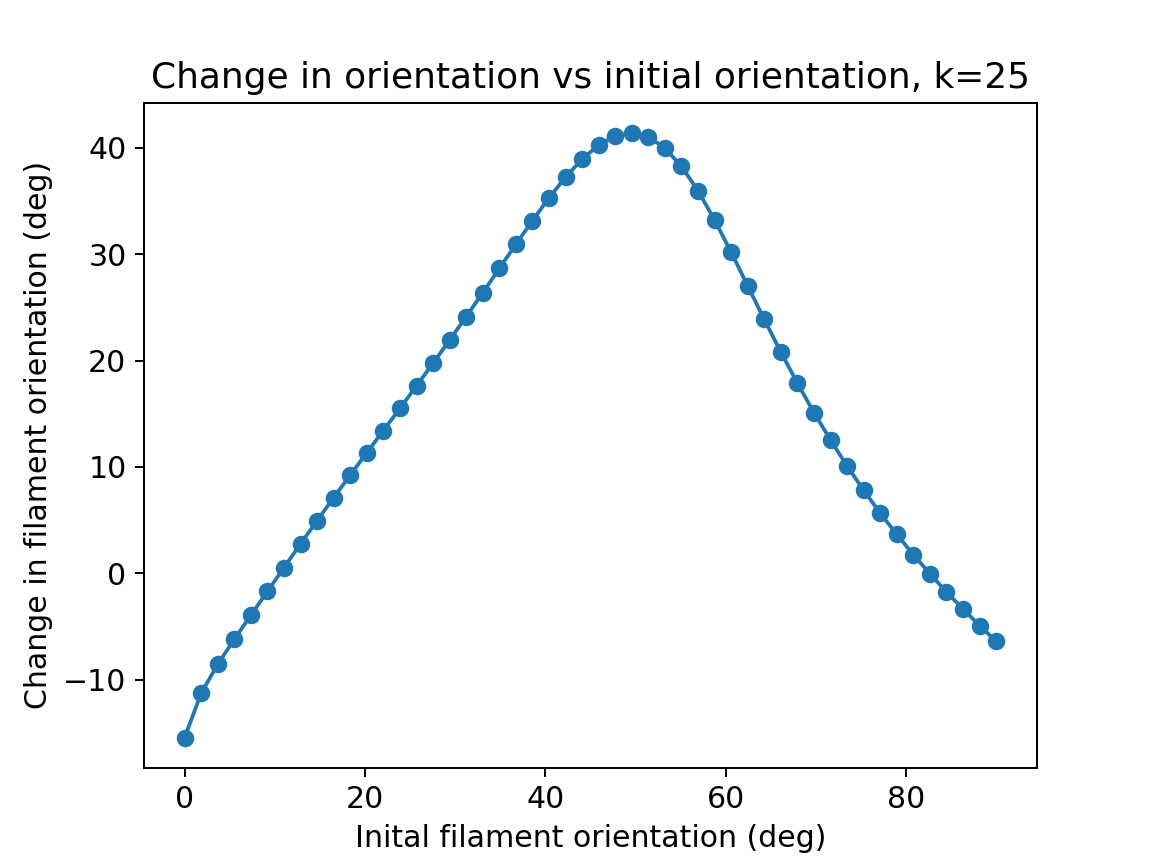

In [264]:
for folder in folders:
    print(folder)
    
    
    # Load metadata
    df_metadata = pd.read_csv(os.path.join(root_folder, folder, 'metadata.csv'))
    activity_timescale = df_metadata[' activity time scale'][0]
    k = df_metadata['spring constant'][0]
    print('Activity time', activity_timescale )
    print('Spring constant', k )
    
    files = [file for file in os.listdir(os.path.join(root_folder, folder)) if file.endswith('hdf5')]
    # Allocate arrays to store the data
    init_angle = np.zeros(len(files))
    delta_angle = np.zeros(len(files))
    
    # For each condition calculate buckling dynamics at different orientations
    for ii, file in enumerate(files):

        folder, *rest = os.path.split(os.path.join(root_folder, folder, file))
        filament = analysis.analysisTools(file = os.path.join(root_folder, folder, file))

        # Calculate the filament base-tip angle
        filament.compute_base_tip_angle()

        # Calculate the change in base-tip angle over the activity cycle
        
        initial_angle = filament.derived_data['base tip angle'][0]
        final_angle = filament.derived_data['base tip angle'][-1]
        
        # Correctly handle the case where the filament angle changes sign 
        # We take the smaller of the two angles (theta, 2pi - theta)
#         if(np.sign(initial_angle)!=np.sign(final_angle)):
            # If the sign changes 
        if(final_angle < 0 and abs(final_angle)> np.pi/2):
            final_angle = 2*np.pi + final_angle
            delta_angle[ii] = final_angle - initial_angle
            
            
            
        else:
            delta_angle[ii] = final_angle - initial_angle
        
        if(delta_angle[ii] > 0):
            delta_angle[ii] = min(delta_angle[ii], 2*np.pi - delta_angle[ii])
        else:
            delta_angle[ii] = min(delta_angle[ii], 2*np.pi + delta_angle[ii])
        init_angle[ii] = initial_angle

    
    # Sort the data based on initial angle
    idx = np.argsort(init_angle)

    init_angle = init_angle[idx]
    delta_angle = delta_angle[idx]
            
    print(init_angle)
            
    # Plot
    init_angle_deg = init_angle*180/np.pi
    delta_angle_deg = delta_angle*180/np.pi

    title= 'Change in orientation vs initial orientation, k=' + str(k)
    plt.figure()
    plt.scatter(init_angle_deg, delta_angle_deg)
    plt.plot(init_angle_deg, delta_angle_deg)
    plt.xlabel('Inital filament orientation (deg)')
    plt.ylabel('Change in filament orientation (deg)')
    plt.title(title)

    # Save the data as a CSV file
    file_name = 'buckling_escape_angles_{}_{}'.format(activity_timescale, k)+'.csv'

    df = pd.DataFrame({'Initial angle (deg)': init_angle_deg, 'Delta angle (deg)':delta_angle_deg, 'spring constant':np.repeat(k, len(init_angle_deg), axis = 0), 'activity time':np.repeat(activity_timescale, len(init_angle_deg), axis = 0)})

    df.to_csv(os.path.join(root_folder, file_name))

# Combined Analysis and Plotting across Filament conditions

In [265]:
spring_constants_to_plot = np.array([25, 30, 35, 40, 50, 60, 65, 70, 80, 90, 100])
# spring_constants_to_plot = np.array([15, 20, 25, 30, 40, 50, 75, 100, 200 ])
# analysis_data_folder = '/Users/deepak/Dropbox/LacryModeling/AnalysisResults/FollowerForce_BucklingDynamics/activity_time_1000'
analysis_data_folder = '/Users/deepak/Dropbox/LacryModeling/AnalysisResults/FollowerForce_BucklingDynamics/b0_4_activity_time_2000'

files = os.listdir(analysis_data_folder)

df_combined = pd.DataFrame({})
for file in files:
    
    if(file.endswith('csv')):
        df = pd.read_csv(os.path.join(analysis_data_folder, file))

        k = df['spring constant'][0]
        print(k)
        if(k in spring_constants_to_plot):
            df_combined = df_combined.append(df)

df_combined



30
25
35
100
50
45
90
85
95
80
55
40
65
70
60
75


Unnamed: 0  Initial angle (deg)  Delta angle (deg)  spring constant  \
0            0             0.000716         -50.596578               30   
1            1             1.837450         -21.946849               30   
2            2             3.674184          -8.472028               30   
3            3             5.510917          -0.230648               30   
4            4             7.347649           6.294651               30   
..         ...                  ...                ...              ...   
45          45            82.653153           4.136834               60   
46          46            84.489865           6.036190               60   
47          47            86.326576           7.871500               60   
48          48            88.163288           9.647545               60   
49          49            90.000000          11.362437               60   

    activity time  
0            2000  
1            2000  
2            2000  
3            2000  
4            2000  
..            ...  
45           2000  
46           2000  
47           2000  
48           2000  
49           2000  

[600 rows x 5 columns]

<IPython.core.display.Javascript object>


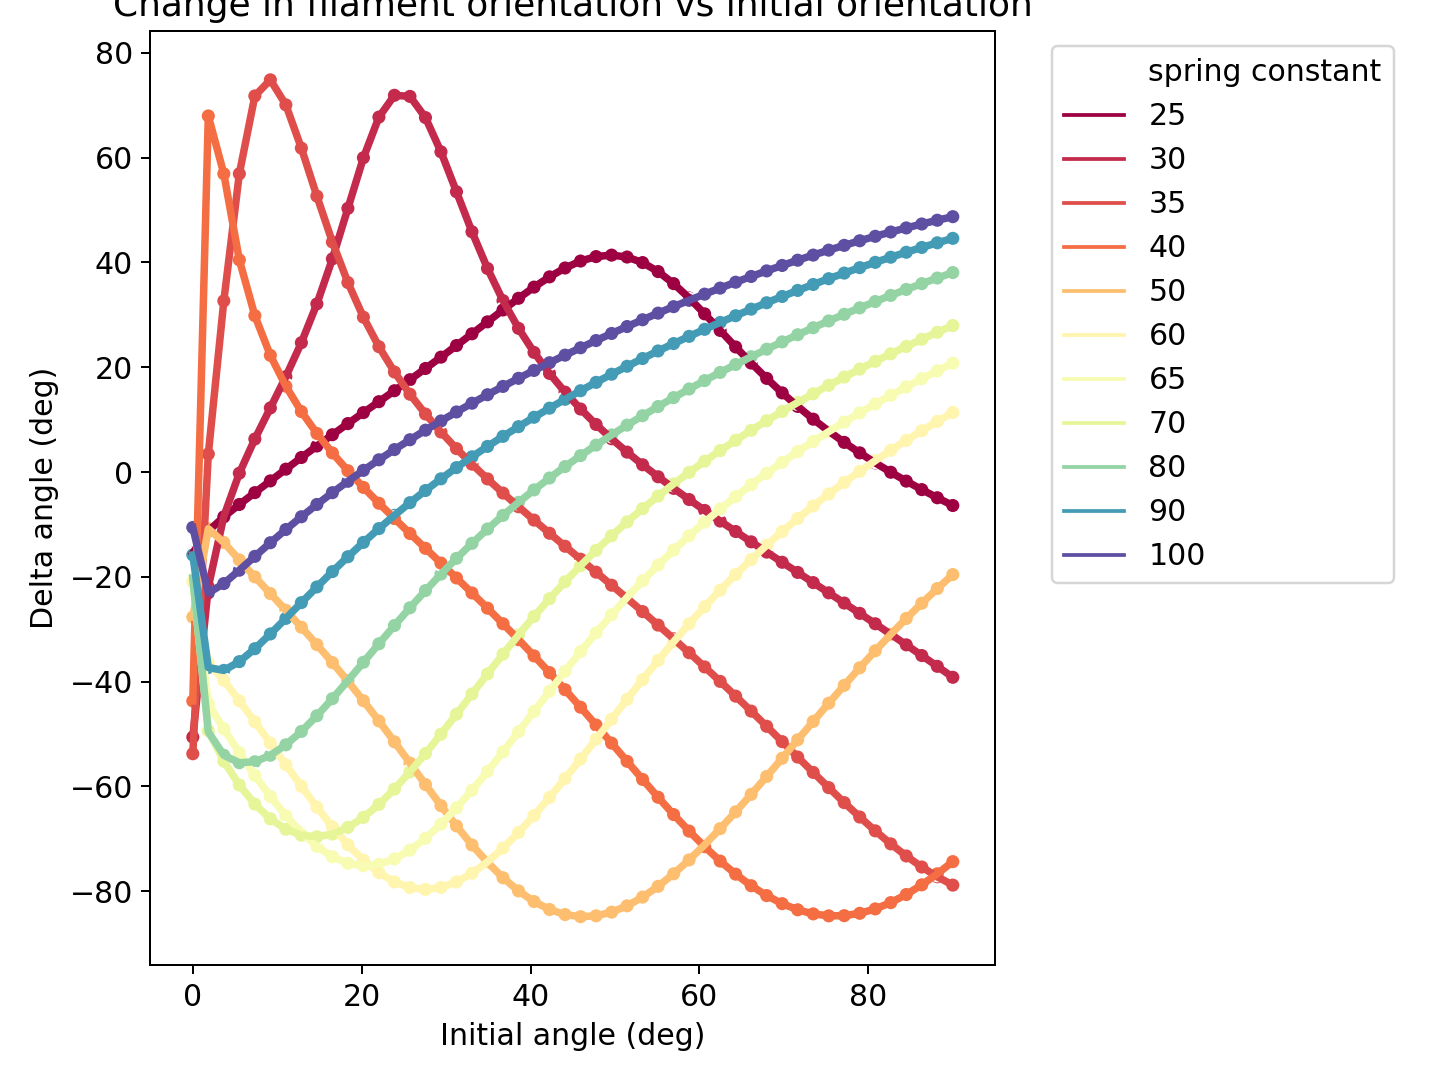

In [266]:
# Plot the orientation dynamics due to buckling for different filament stiffness
from matplotlib.colors import LogNorm

file_path = analysis_data_folder

plt.figure(figsize=(8,6))
sns.lineplot(x='Initial angle (deg)', y = 'Delta angle (deg)', hue = 'spring constant',  
             data = df_combined, legend='full', palette = 'Spectral', linewidth = 3)
sns.scatterplot(x='Initial angle (deg)', y = 'Delta angle (deg)', hue = 'spring constant',  
             data = df_combined, palette = 'Spectral', legend = False)
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.title('Change in filament orientation vs initial orientation')
plt.savefig(os.path.join(file_path, 'delta_p_vs_p_followerforce_activity_time_{}.png'.format(df['activity time'][0])), dpi = 300)
plt.savefig(os.path.join(file_path, 'delta_p_vs_p_followerforce_activity_time_{}.svg'.format(df['activity time'][0])), dpi = 300)

plt.show()


<IPython.core.display.Javascript object>


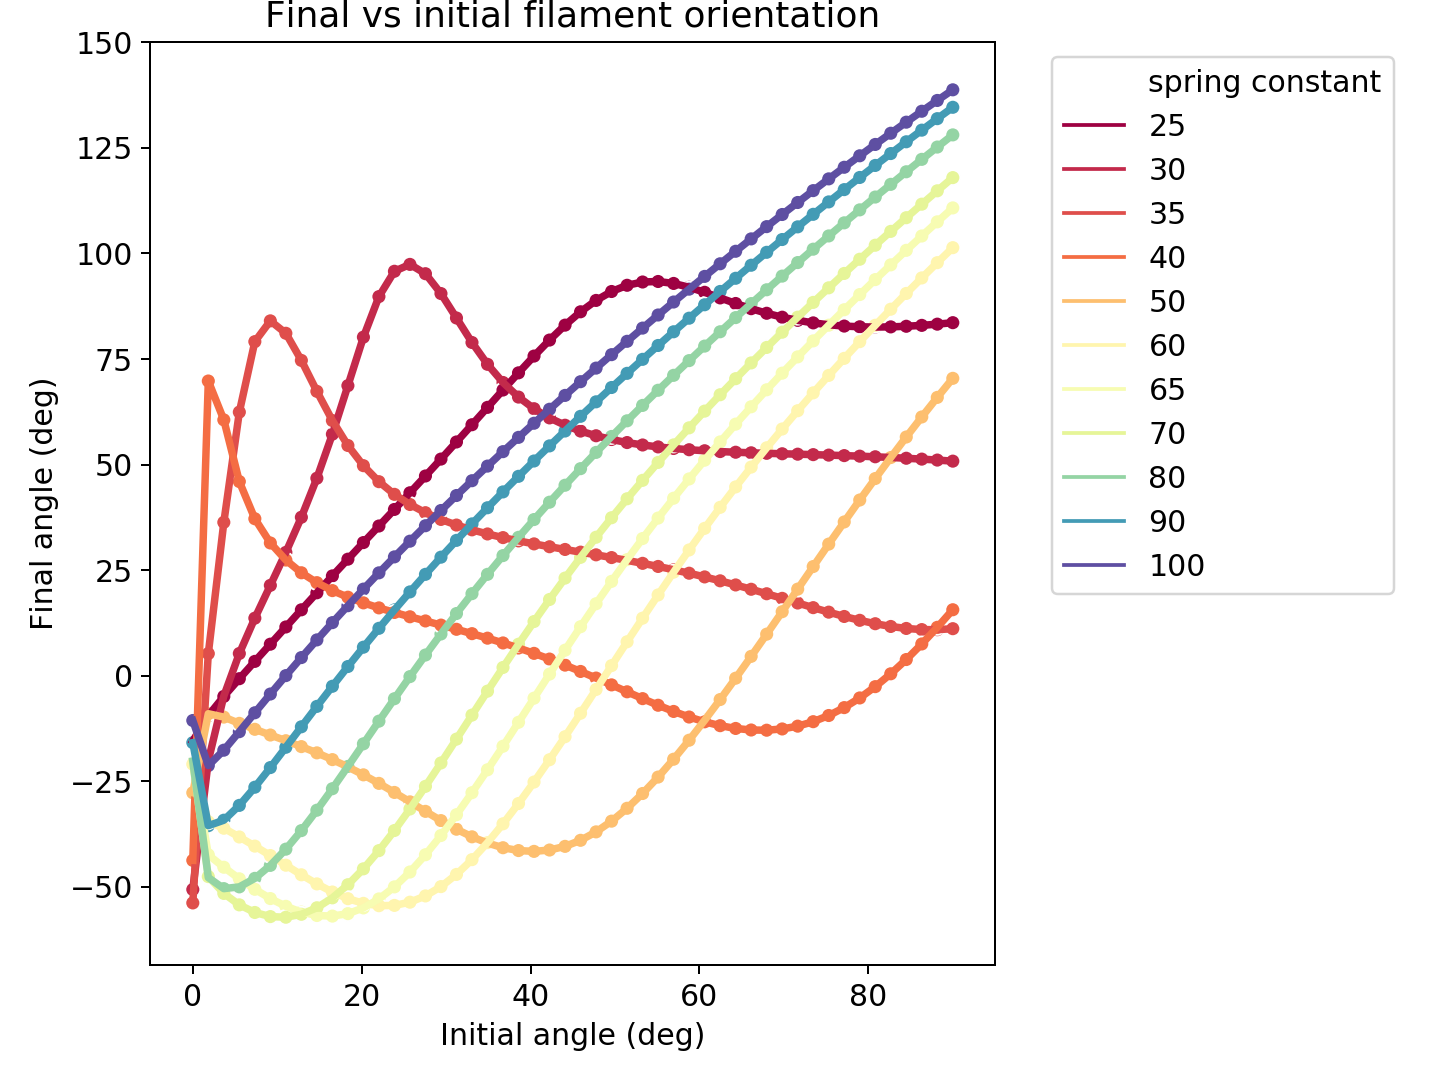

In [267]:
# Plot the final angle vs initial angle
df_combined['Final angle (deg)'] = df_combined['Initial angle (deg)'] + df_combined['Delta angle (deg)'] 

plt.figure(figsize=(8,6))
sns.lineplot(x='Initial angle (deg)', y = 'Final angle (deg)', hue = 'spring constant',  
             data = df_combined, legend='full', palette = 'Spectral', linewidth = 3)
sns.scatterplot(x='Initial angle (deg)', y = 'Final angle (deg)', hue = 'spring constant',  
             data = df_combined, palette = 'Spectral', legend = False)
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.title('Final vs initial filament orientation')
plt.show()

# Alternate representations of the orientation velocity vs orientation

-84.86819670142373
74.84952729398748


<IPython.core.display.Javascript object>


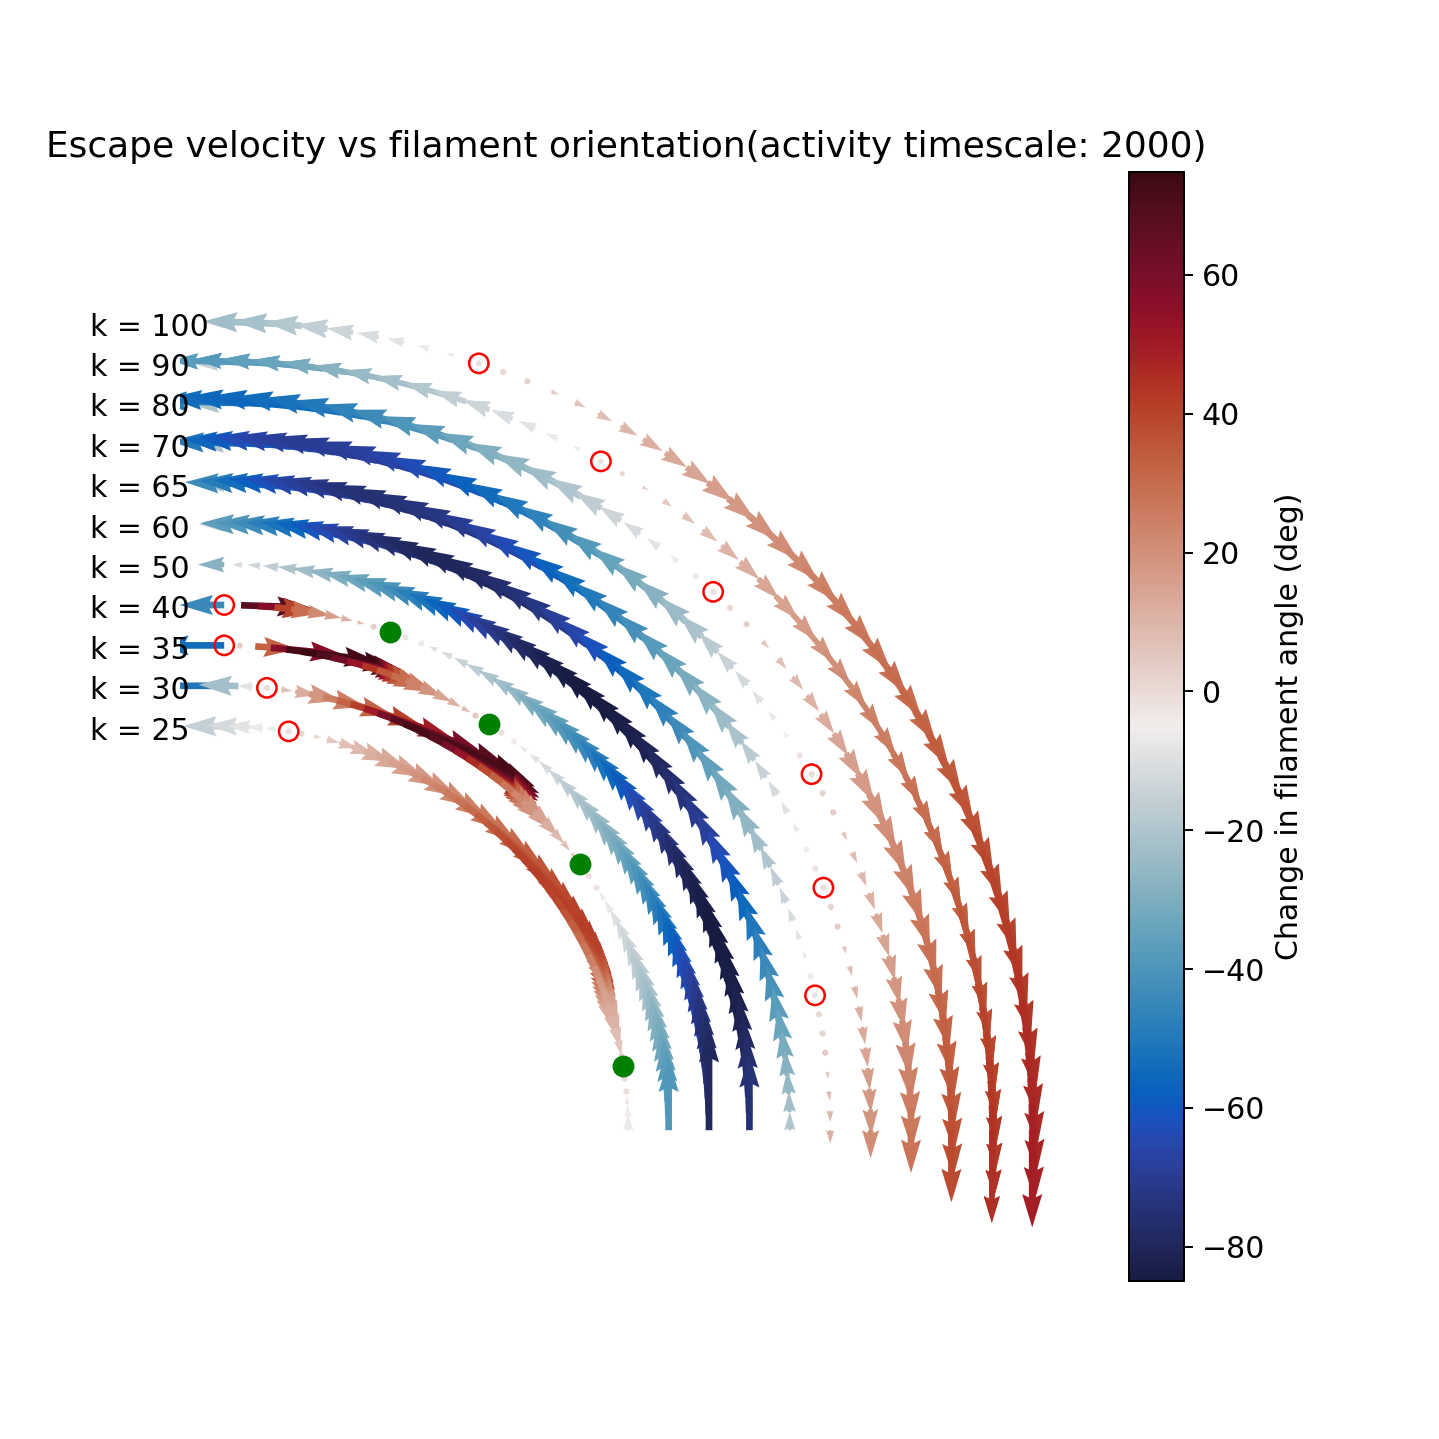

[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[ 1. -1.]
[]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


In [268]:
import cmocean
import matplotlib as mpl
file_path = analysis_data_folder

# Plotting it as a polar quiver plot
# Assign a distinct radius for each filament stiffness

delta_min = np.min(df_combined['Delta angle (deg)'])
delta_max = np.max(df_combined['Delta angle (deg)'])

print(delta_min)
print(delta_max)

norm = mpl.colors.Normalize(vmin= delta_min, vmax=delta_max)

cm = cmocean.cm.balance

sm = mpl.cm.ScalarMappable(cmap=cm, norm=norm)

plt.figure(figsize=(8,8))
for jj, k in enumerate(spring_constants_to_plot):
    
    df = df_combined[df_combined['spring constant'] == k]
    
    R = 30 + 3*jj
    vx = df['Delta angle (deg)']*np.cos(np.pi/180*df['Initial angle (deg)'])
    vy = -df['Delta angle (deg)']*np.sin(np.pi/180*df['Initial angle (deg)'])
    
    x = R*np.sin(np.pi/180*df['Initial angle (deg)'])
    y = R*np.cos(np.pi/180*df['Initial angle (deg)'])
    
    # Detect fixed-points of Delta angle
    fixed_points = np.where(np.diff(np.sign(df['Delta angle (deg)'])))[0]
    
    # Detect if fixed points are "Stable" or "Unstable"
    stability = np.sign(np.diff(df['Delta angle (deg)'])[fixed_points])
    print(stability)
    
    
    color_data = np.array(df['Delta angle (deg)'])
    
    plt.quiver(x, y, vx, vy, color = cm(norm(color_data)))
    plt.text(x[0]-10, y[0]-1, 'k = '+str(k))
    for ii, fixed_point in enumerate(fixed_points):
        if(stability[ii] > 0):
            # Unstable fixed point
            plt.scatter(x[fixed_point], y[fixed_point], 60, facecolors='none', edgecolors='r')
        elif(stability[ii] < 0):
            # Stable fixed point
            plt.scatter(x[fixed_point], y[fixed_point], 60, color = 'g')
   
cbar = plt.colorbar(sm)
plt.axis('equal')
plt.axis('off')
plt.xlabel('X')
plt.xlabel('Y')
cbar.ax.set_ylabel('Change in filament angle (deg)')
plt.title('Escape velocity vs filament orientation' + '(activity timescale: {})'.format(df['activity time'][0]))
plt.savefig(os.path.join(file_path, 'Escape velocity vs filament orientation_activity_time_{}.png'.format(df['activity time'][0])), dpi = 300)
plt.savefig(os.path.join(file_path, 'Escape velocity vs filament orientation_activity_time_{}.svg'.format(df['activity time'][0])), dpi = 300)

plt.show()
    

In [171]:

delta_min = np.min(df['Delta angle (deg)'])
delta_max = np.max(df['Delta angle (deg)'])

print(delta_min)
print(delta_max)

-0.08178003059214704
12.773146946531634
